# 0. Introdução

Bem vindo ao meu notebook da segunda semana do Challenge de Data Science!

Vamos utilizar a base de dados tratada da semana 1 e após algumas modificações vamos aplicar alguns modelos de machine learning.


# 1. Importação das bibliotecas

O primeiro passo para começar os tratamentos é instalar e importar as bibliotecas necessárias. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



# 2. Importação dos dados

Vamos exportar os dados tratados na semana 1

In [2]:
dados = pd.read_csv("dados_etapa1.csv")
dados.head()

,customer_id,churn,customer_gender,customer_senior_citizen,customer_partner,customer_dependents,customer_tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


# 3.Preparando os dados

Nessa etapa vamos transformar as variaveis categóricas em númericas.


### 3.1 Transformando os dados categóricos em binárias

Transforme as variáveis categóricas binárias em valores numéricos, pois os modelos de machine learning geralmente operam melhor com esse tipo de dado. Além disso, alguns algoritmos podem ter dificuldades se as variáveis categóricas não forem tratadas adequadamente. Converter em 0 e 1 ajuda a evitar possíveis erros durante o treinamento do modelo.

In [3]:
traducao_dic = {'Yes': 1,
                'No': 0,
                'Female': 0,
                'Male': 1}

dadosmodificados = dados[['churn', 'customer_gender', 'customer_partner', 'customer_dependents', 'phone_service', 'paperless_billing']].replace(traducao_dic)
dadosmodificados.head()

,churn,customer_gender,customer_partner,customer_dependents,phone_service,paperless_billing
0,0,0,1,1,1,1
1,0,1,0,0,1,0
2,1,1,0,0,1,1
3,1,1,1,0,1,1
4,1,0,1,0,1,1


### 3.2 Usando get_dummies() nas variáveis com mais de duas categorias 

In [4]:
dummie_dados = pd.get_dummies(dados[['multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'payment_method' ]])
dummie_dados.head()

,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_service_DSL,internet_service_Fiber optic,internet_service_No,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,...,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,True,False,False,True,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1,False,False,True,True,False,False,True,False,False,True,...,False,False,True,True,False,False,False,False,False,True
2,True,False,False,False,True,False,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
3,True,False,False,False,True,False,True,False,False,False,...,False,False,True,True,False,False,False,False,True,False
4,True,False,False,False,True,False,True,False,False,True,...,True,False,False,True,False,False,False,False,False,True


In [5]:
dados_num = dados[['customer_tenure', 'monthly_charges', 'total_charges']]


#junção dos dados trasformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados, dados_num], axis=1)



#vendo todas as colunas:
pd.set_option('display.max_columns', 40)
dados_final.head()


,churn,customer_gender,customer_partner,customer_dependents,phone_service,paperless_billing,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,internet_service_DSL,internet_service_Fiber optic,internet_service_No,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,customer_tenure,monthly_charges,total_charges
0,0,0,1,1,1,1,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,True,9,65.6,593.30
1,0,1,0,0,1,0,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,9,59.9,542.40
2,1,1,0,0,1,1,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,4,73.9,280.85
3,1,1,1,0,1,1,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,13,98.0,1237.85
4,1,0,1,0,1,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,True,3,83.9,267.40


In [6]:
dados_final.columns

Index(['churn', 'customer_gender', 'customer_partner', 'customer_dependents',
       'phone_service', 'paperless_billing', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'internet_service_No', 'online_security_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'payment_method_Bank transfer (automatic)',
       'payment_method_Cred

# 4. Balanceando a variavel target

In [7]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  
X = dados_final.drop('churn', axis = 1)
y = dados_final['churn']



smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados


dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


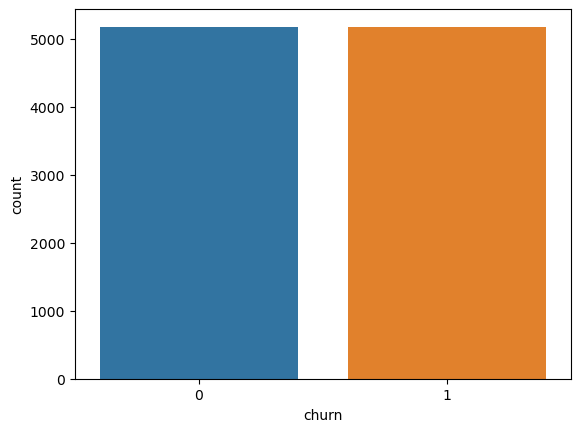

In [8]:
ax = sns.countplot(x='churn', data=dados_final)  # plotando a variável target balanceada.

# 5. Treinamento

### Separar os dados em treino e teste 

### (Essa etapa não sera necessaria pois vamos usar o metodo de validação cruzada)

In [9]:
X = dados_final.drop('churn', axis = 1)
y = dados_final['churn']

# SEED = 5
# np.random.seed(SEED)
# treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.2,
#                                                          stratify = y)
# print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

### Padronizando os dados com o StandardScaler() 

### (Essa etapa não sera necessaria pois vamos passar StandardScaler() no pipeline dentro da função imprime_resultados a seguir)

In [10]:
# # Criando um objeto StandardScaler
# scaler = StandardScaler()

# # Ajuste o scaler aos dados de treinamento
# scaler.fit(treino_x)

# # Aplique a transformação aos dados de treinamento
# treino_x = scaler.transform(treino_x)

# # Aplique a mesma transformação aos dados de teste
# teste_x = scaler.transform(teste_x)

### Testando Modelos

Primeiro vamos definir a função imprime_resultados, nela vamos criar um pipelene e usar a validação cruzada

In [11]:
def test_methods(models, X, y, n_splits=3, shuffle=True):
    print("Resultados do treinamento: ", end="\n\n")
    SEED = 42
    np.random.seed(SEED)
    cv = KFold(n_splits=n_splits, shuffle=shuffle)  # Número de folds
    model_metrics = pd.DataFrame(columns=['Method', 'Recall', 'Precision', 'F1-Score', 'Accuracy'])


    # Especifique as métricas que deseja calcular, vai dentro da validação cruzada
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }

    
    methods_test_results = []  # Crie uma lista para armazenar os resultados

    for model in models:
        # Criando um pipeline com etapas de pré-processamento e o modelo
        pipeline = Pipeline([
            ('transformacao', StandardScaler()),  # Padroniza os dados
            ('estimador', model)        # modelo
            ])
        # validação cruzada e as metricas
        results = cross_validate(pipeline, X, y, cv = cv, scoring=scoring, return_train_score=False)

        # Extraia as métricas médias de todos os folds
        mean_accuracy =  results['test_accuracy'].mean()
        mean_precision = results['test_precision'].mean()
        mean_recall =    results['test_recall'].mean()
        mean_f1 =        results['test_f1'].mean()


        test_results = {'Method' : [model],
                        'Recall' : [mean_recall],
                        'Precision': [mean_precision],
                        'F1-Score' : [mean_f1],
                        'Accuracy': [mean_accuracy]}
        
        # Crie um DataFrame a partir do dicionário
        df_test_results = pd.DataFrame(test_results)


        # Adicione os resultados à lista
        methods_test_results.append(pd.DataFrame(test_results))

    # Concatene todos os DataFrames na lista em um único DataFrame
    final_results = pd.concat(methods_test_results, ignore_index=True)

    return final_results

In [14]:
models_to_test = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    xgb.XGBClassifier(),
    PassiveAggressiveClassifier(),
    LogisticRegression()
    
]

test_results = test_methods(models_to_test, X, y)
test_results


Resultados do treinamento: 



c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn

,Method,Recall,Precision,F1-Score,Accuracy
0,SVC(),0.821979,0.863870,0.842395,0.846250
1,DecisionTreeClassifier(),0.812287,0.803463,0.807716,0.806726
2,KNeighborsClassifier(),0.833122,0.819218,0.826080,0.824604
3,"XGBClassifier(base_score=None, booster=None, c...",0.840245,0.867889,0.853581,0.855915
4,PassiveAggressiveClassifier(),0.812711,0.806549,0.807881,0.807211
5,LogisticRegression(),0.834006,0.860525,0.846977,0.849343


O XGBClassifier e o LogisticRegression são os modelo que nos trás os melhores resultados, dessa forma, vamos otimizar eles para ver qual se sai melhor.

# 6. Otimização do modelo

Para melhorá-lo ainda mais o resultado obtido, agora vamos fazer uma otimização dos hiperparâmetros do modelo. Isso pode ajudar a maximizar o desempenho e a precisão do seu modelo. Para isso vamo utilizar a tecnica de GridSearchCV.

### Otimazação do XGBClassifier()

In [18]:
# lembrando que
X = dados_final.drop('churn', axis = 1)
y = dados_final['churn']

# Defina o modelo XGBoost
model = xgb.XGBClassifier()

# Defina um dicionário de hiperparâmetros que você deseja otimizar
param_grid = {
    'n_estimators': [100, 200, 300, 400],        # Número de árvores (estimadores)
    'max_depth': [3, 5, 7, 9],                # Profundidade máxima da árvore
    'learning_rate': [0.001, 0.01, 0.1, 0.2],     # Taxa de aprendizado
    'min_child_weight': [1, 2, 3, 4]          # Peso mínimo da folha
}

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Execute a busca em grade para encontrar a melhor combinação de hiperparâmetros
grid_search.fit(X, y)

# Obtenha os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Obtenha o melhor modelo encontrado
best_model = grid_search.best_estimator_

# Obtenha o melhor escore de validação cruzada
best_score = grid_search.best_score_

print("Melhores hiperparâmetros encontrados:", best_params)
print("Melhor modelo encontrado:", best_model)
print("Melhor escore de validação cruzada:", best_score)

Melhores hiperparâmetros encontrados: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 400}
Melhor modelo encontrado: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Melhor escore de validação cruzada: 0.8432675123691578


In [14]:
model =   xgb.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None)


test_results = test_methods([model], X, y)

test_results

Resultados do treinamento: 



c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
c:\Users\leona\anaconda3\envs\envEstudos\lib\site-packages\xgboost\data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


,Method,Recall,Precision,F1-Score,Accuracy
0,"XGBClassifier(base_score=None, booster=None, c...",0.855894,0.854887,0.85539,0.855432


### Otimazação do LogisticRegression()

In [15]:
# Defina o modelo LogisticRegression
model = LogisticRegression(max_iter=10000)  # Aumentamos o número máximo de iterações para evitar convergência prematura

# Defina um dicionário de hiperparâmetros que você deseja otimizar
param_grid = {
    'penalty': ['l1', 'l2'],              # Tipo de penalização (L1 ou L2)
    'C': [0.001, 0.01, 0.1, 1, 10],      # Parâmetro de regularização
    'solver': ['liblinear', 'saga'],      # Algoritmo de otimização
    'class_weight': [None, 'balanced'],   # Peso das classes
}

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Execute a busca em grade para encontrar a melhor combinação de hiperparâmetros
grid_search.fit(X, y)

# Obtenha os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Obtenha o melhor modelo encontrado
best_model = grid_search.best_estimator_

# Obtenha o melhor escore de validação cruzada
best_score = grid_search.best_score_

print("Melhores hiperparâmetros encontrados:", best_params)
print("Melhor modelo encontrado:", best_model)
print("Melhor escore de validação cruzada:", best_score)


Melhores hiperparâmetros encontrados: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Melhor modelo encontrado: LogisticRegression(C=10, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')
Melhor escore de validação cruzada: 0.8339905623151047


In [16]:
model = LogisticRegression(C=10, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')


test_results = test_methods([model], X, y)

test_results

Resultados do treinamento: 



,Method,Recall,Precision,F1-Score,Accuracy
0,"LogisticRegression(C=10, class_weight='balance...",0.830988,0.861057,0.845744,0.848473


# 7. Salvando o modelo 

In [17]:
# Para salvar o modelo treinado, primeiro devemos treinar o modelo usando os dados (X e y) 

model.fit(X, y)


LogisticRegression(C=10, class_weight='balanced', max_iter=10000, penalty='l1',
                   solver='liblinear')

In [19]:
def save_model(model,name):
    import pickle
    arquivo = name + '.pkl'
    with open(arquivo,'wb') as file:
        pickle.dump(model,file)
    print('Model sklearn saved: ',name)

def save_model1(model,name):
    import pickle
    arquivo = name + '.json'
    with open(arquivo,'w') as file:
        pickle.dump(model,file)
    print('Model sklearn saved: ',name)


def load_model(name):
    import pickle
    arquivo = name + '.pkl'
    with open(arquivo,'rb') as file:
        model = pickle.load(file)
    print('Model sklearn loaded')
    return model

In [20]:
save_model(model, 'LogisticRegression')

Model sklearn saved:  LogisticRegression


In [22]:
modelo = load_model('LogisticRegression') 

Model sklearn loaded


In [23]:
modelo.predict(X.iloc[0:10, :])

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)